In [1]:
import numpy as np
import sys, os, shutil
import pandas as pd
import collections as cl
import itertools as it
import timeit
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy as cp
import umap
#Change directory
os.chdir("C:/Users/yche465/Desktop/CS570/Project")
os.getcwd()


'C:\\Users\\yche465\\Desktop\\CS570\\Project'

In [2]:
#Import PDC dataset
PDC = np.loadtxt('PDC.txt', usecols=range(103), delimiter=",")

In [2]:
import pickle
pickle_in=open("sPDC_DISTM","rb")
loadobj=pickle.load(pickle_in)


In [3]:
DISTM_15=loadobj["DISTM_15"]
DISTM_10=loadobj["DISTM_10"]
DISTM_5=loadobj["DISTM_5"]
DISTM_1=loadobj["DISTM_1"]
PDC_S1_sample15=loadobj['PDC_S1_sample15']
PDC_S1_sample10=loadobj['PDC_S1_sample10']
PDC_S1_sample5=loadobj['PDC_S1_sample5']
PDC_S1_sample1=loadobj['PDC_S1_sample1']

### Determine the minimal sufficient sample size for KMedoid

In [6]:
# create helper functions for computing silhouette indices for k= 2 ~ 12
from sklearn_extra.cluster import KMedoids
from tslearn.clustering import silhouette_score as tsil_index
def TS_SIL(dist_data):
    DISTM=dist_data
    #create list objects to be returned: Silhouette score, cluster label, cluster medoid indices
    Ts_Sil=[]
    S2_cluster_label=[]
    S2_Med_indices=[]  
    
    for i in range(len(DISTM)):
        print("S1 Cluster ",i)
        #loop for generating cluster validation indices
        SIL=[]
        S2C=[]
        MI=[]
        for k in range(2,13):
            cluster = KMedoids(n_clusters=k, metric='precomputed',random_state=0, init='k-medoids++',method='pam').fit(DISTM[i])
            cluster_labels=cluster.labels_
            S2C.append(cluster_labels)
            MI.append(cluster.medoid_indices_)
            
            #cluster validation: silhouette
            SL_avg =tsil_index(DISTM[i], cluster_labels, metric="precomputed")
            SIL.append(SL_avg)
        Ts_Sil.append(SIL)
        S2_cluster_label.append(S2C)
        S2_Med_indices.append(MI)
    return Ts_Sil, S2_cluster_label,S2_Med_indices

In [7]:
#Implement the function for computing silhouette indices for each sample dataset
Ts_Sil_1,S2C_Label_1, S2_Med_indices1 =TS_SIL(DISTM_1)
Ts_Sil_5,S2C_Label_5,S2_Med_indices5=TS_SIL(DISTM_5)
Ts_Sil_10,S2C_Label_10,S2_Med_indices10=TS_SIL(DISTM_10)
Ts_Sil_15,S2C_Label_15,S2_Med_indices15=TS_SIL(DISTM_15)

S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0
S1 Cluster  1
S1 Cluster  2
S1 Cluster  3
S1 Cluster  0


KeyboardInterrupt: 

In [27]:
# #Store the silhouette indices, PAM cluster label and medioid indices as pickle objects
# PAM_obj={'Ts_Sil_1':Ts_Sil_1, 'S2C_Label_1':S2C_Label_1, 'S2_Med_indices1':S2_Med_indices1,
#          'Ts_Sil_5':Ts_Sil_5,'S2C_Label_5':S2C_Label_5, 'S2_Med_indices5':S2_Med_indices5,
#          'Ts_Sil_10':Ts_Sil_10,'S2C_Label_10':S2C_Label_10, 'S2_Med_indices10':S2_Med_indices10,
#          'Ts_Sil_15':Ts_Sil_15,'S2C_Label_15':S2C_Label_15, 'S2_Med_indices15':S2_Med_indices15}


# import pickle
# pickle_out=open("PAM_obj","wb")
# pickle.dump(PAM_obj,pickle_out)
# pickle_out.close()

In [10]:
import pickle
pickle_in=open("PAM_obj","rb")
obj=pickle.load(pickle_in)

Ts_Sil_1=obj['Ts_Sil_1']
S2C_Label_1=obj['S2C_Label_1']
S2_Med_indices1=obj['S2_Med_indices1']

Ts_Sil_5=obj['Ts_Sil_5']
S2C_Label_5=obj['S2C_Label_5']
S2_Med_indices5=obj['S2_Med_indices5']

Ts_Sil_10=obj['Ts_Sil_10']
S2C_Label_10=obj['S2C_Label_10']
S2_Med_indices10=obj['S2_Med_indices10']

Ts_Sil_15=obj['Ts_Sil_15']
S2C_Label_15=obj['S2C_Label_15']
S2_Med_indices15=obj['S2_Med_indices15']

(-0.1, 1.0)

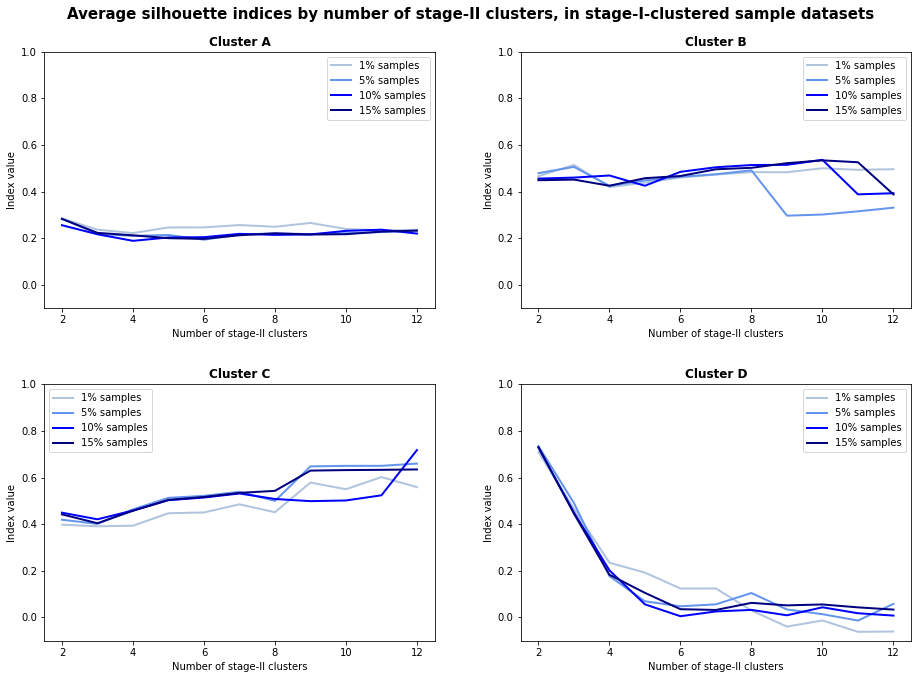

In [12]:
lin=np.arange(2,13)
fig,ax =  plt.subplots(2,2,figsize=(14,10))
fig.tight_layout(pad=5.5)
fig.suptitle('Average silhouette indices by number of stage-II clusters, in stage-I-clustered sample datasets',fontsize=15,fontweight="bold")
#Cluster A
ax[0][0].set_title("Cluster A", fontsize=12,fontweight="bold")
ax[0][0].plot(lin,Ts_Sil_1[0], "lightsteelblue", linewidth=2, label="1% samples")
ax[0][0].plot(lin,Ts_Sil_5[0], "cornflowerblue", linewidth=2,label="5% samples")
ax[0][0].plot(lin,Ts_Sil_10[0], "blue", linewidth=2, label="10% samples")
ax[0][0].plot(lin,Ts_Sil_15[0], "navy", linewidth=2,label="15% samples")
ax[0][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][0].set_ylabel('Index value', fontsize=10)
ax[0][0].legend()
ax[0][0].set_ylim(-0.1,1)

#Cluster 2
ax[0][1].set_title("Cluster B", fontsize=12,fontweight="bold")
ax[0][1].plot(lin,Ts_Sil_1[1], "lightsteelblue", linewidth=2, label="1% samples")
ax[0][1].plot(lin,Ts_Sil_5[1], "cornflowerblue", linewidth=2,label="5% samples")
ax[0][1].plot(lin,Ts_Sil_10[1], "blue", linewidth=2, label="10% samples")
ax[0][1].plot(lin,Ts_Sil_15[1], "navy", linewidth=2,label="15% samples")
ax[0][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][1].set_ylabel('Index value', fontsize=10)
ax[0][1].legend()
ax[0][1].set_ylim(-0.1,1)

#Cluster 3
ax[1][0].set_title("Cluster C", fontsize=12,fontweight="bold")
ax[1][0].plot(lin,Ts_Sil_1[2], "lightsteelblue", linewidth=2, label="1% samples")
ax[1][0].plot(lin,Ts_Sil_5[2], "cornflowerblue", linewidth=2,label="5% samples")
ax[1][0].plot(lin,Ts_Sil_10[2], "blue", linewidth=2, label="10% samples")
ax[1][0].plot(lin,Ts_Sil_15[2], "navy", linewidth=2,label="15% samples")
ax[1][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][0].set_ylabel('Index value', fontsize=10)
ax[1][0].legend()
ax[1][0].set_ylim(-0.1,1)

#Cluster 4
ax[1][1].set_title("Cluster D", fontsize=12,fontweight="bold")
ax[1][1].plot(lin,Ts_Sil_1[3], "lightsteelblue", linewidth=2, label="1% samples")
ax[1][1].plot(lin,Ts_Sil_5[3], "cornflowerblue", linewidth=2,label="5% samples")
ax[1][1].plot(lin,Ts_Sil_10[3], "blue", linewidth=2, label="10% samples")
ax[1][1].plot(lin,Ts_Sil_15[3], "navy", linewidth=2,label="15% samples")
ax[1][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][1].set_ylabel('Index value', fontsize=10)
ax[1][1].legend()
ax[1][1].set_ylim(-0.1,1)

### Determine the optimal number of Stage II cluster for each Stage I cluster population

In [13]:
#cluster 1: 5%
#cluster 2: 10%
#cluster 3: 5%
#cluster 4: 10%

#group the PDC sample data according to the S2 cluster label under each k 
def group_PDC(S1C1_PDC_sample,S1C1_label_byK,kmax):
    S1C1_PDC_Sample_labeled=[]
    for i,K in enumerate(np.arange(2,kmax)):
        P=[]
        for k in range(K):
            P.append(S1C1_PDC_sample[S1C1_label_byK[i]==k])
        S1C1_PDC_Sample_labeled.append(P)
    return S1C1_PDC_Sample_labeled

In [14]:
# create Stage-II cluster label list for each Stage-I cluster: [cluster 1] [cluster 2 k=?] [label]  
S1C1_label_byK=S2C_Label_5[0]
S1C2_label_byK=S2C_Label_10[1]
S1C3_label_byK=S2C_Label_5[2]
S1C4_label_byK=S2C_Label_10[3]

#create the selected PDC sample data for each Stage-I cluster 
S1C1_PDC_sample5=PDC_S1_sample5[0]
S1C2_PDC_sample10=PDC_S1_sample10[1]
S1C3_PDC_sample5=PDC_S1_sample5[2]
S1C4_PDC_sample10=PDC_S1_sample10[3]

In [15]:
S1C1_PDC_Sample5_labeled=group_PDC(S1C1_PDC_sample5,S1C1_label_byK,13)
S1C2_PDC_Sample10_labeled=group_PDC(S1C2_PDC_sample10,S1C2_label_byK,13)
S1C3_PDC_Sample5_labeled=group_PDC(S1C3_PDC_sample5,S1C3_label_byK,13)
S1C4_PDC_Sample10_labeled=group_PDC(S1C4_PDC_sample10,S1C4_label_byK,13)

In [16]:
#create a list of cluster medoid for each stage-I cluster sample dataset
S1C1_Med_Sample5=[]
for i in range(len(S2_Med_indices5[0])):
    S1C1_Med_Sample5.append(S1C1_PDC_sample5[S2_Med_indices5[0][i]])
    
S1C2_Med_Sample10=[]
for i in range(len(S2_Med_indices10[1])):
    S1C2_Med_Sample10.append(S1C2_PDC_sample10[S2_Med_indices10[1][i]])
    
S1C3_Med_Sample5=[]
for i in range(len(S2_Med_indices5[2])):
    S1C3_Med_Sample5.append(S1C3_PDC_sample5[S2_Med_indices5[2][i]])

S1C4_Med_Sample10=[]
for i in range(len(S2_Med_indices10[3])):
    S1C4_Med_Sample10.append(S1C4_PDC_sample10[S2_Med_indices10[3][i]])

In [17]:
from tslearn.metrics import dtw
#Compute Sum of Squared Error by k values for each stage-I cluster sample dataset 
def SSE(S1C1_PDC_Sample5_labeled,S1C1_DBA_Sample5):
    S1C1_SSE=[]
    for k in range(len(S1C1_PDC_Sample5_labeled)):         
        d=[dtw(S1C1_PDC_Sample5_labeled[k][cluster_id][i],S1C1_DBA_Sample5[k][cluster_id],
            global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
            for cluster_id in range(len(S1C1_PDC_Sample5_labeled[k])) 
            for i in range(len(S1C1_PDC_Sample5_labeled[k][cluster_id]))]
        SSE=sum(np.square(d))
        S1C1_SSE.append(SSE)
    return S1C1_SSE

S1C1_SSE=SSE(S1C1_PDC_Sample5_labeled,S1C1_Med_Sample5)
S1C2_SSE=SSE(S1C2_PDC_Sample10_labeled,S1C2_Med_Sample10)
S1C3_SSE=SSE(S1C3_PDC_Sample5_labeled,S1C3_Med_Sample5)
S1C4_SSE=SSE(S1C4_PDC_Sample10_labeled,S1C4_Med_Sample10)

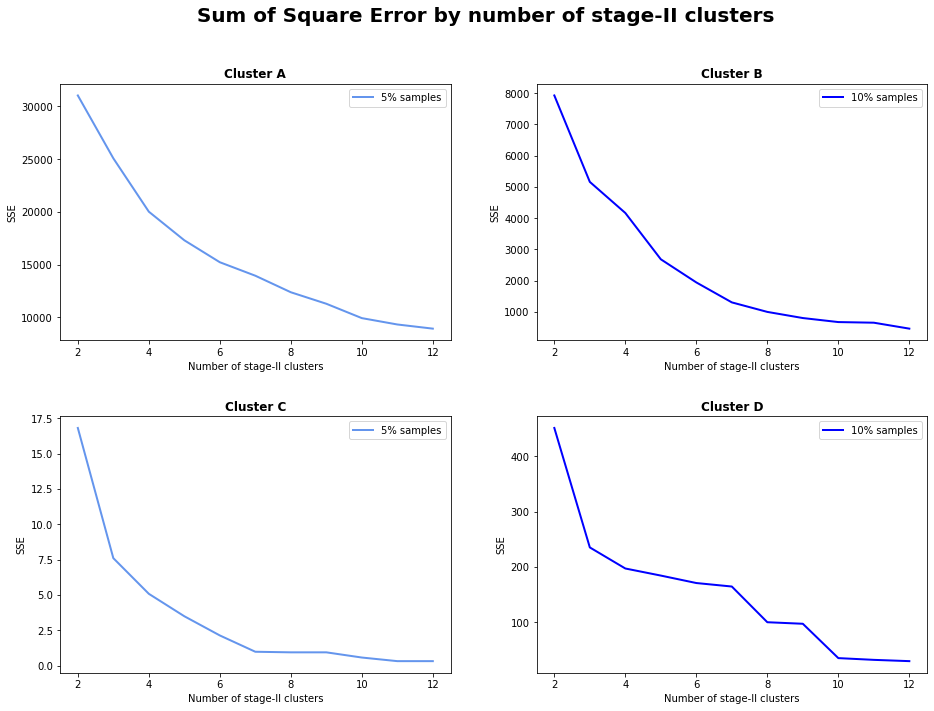

In [20]:
lin=np.arange(2,13)
fig,ax =  plt.subplots(2,2,figsize=(14,10))
fig.tight_layout(pad=5.5)
fig.suptitle('Sum of Square Error by number of stage-II clusters',fontsize=20,fontweight="bold",y=1.025)
#Cluster 1
ax[0][0].set_title("Cluster A", fontsize=12,fontweight="bold")
ax[0][0].plot(lin,S1C1_SSE, "cornflowerblue", linewidth=2,label="5% samples")
ax[0][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][0].set_ylabel('SSE', fontsize=10)
ax[0][0].legend()

#Cluster 2
ax[0][1].set_title("Cluster B", fontsize=12,fontweight="bold")
ax[0][1].plot(lin,S1C2_SSE, "blue", linewidth=2,label="10% samples")
ax[0][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[0][1].set_ylabel('SSE', fontsize=10)
ax[0][1].legend()

#Cluster 3
ax[1][0].set_title("Cluster C", fontsize=12,fontweight="bold")
ax[1][0].plot(lin,S1C3_SSE, "cornflowerblue", linewidth=2,label="5% samples")
ax[1][0].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][0].set_ylabel('SSE', fontsize=10)
ax[1][0].legend()

#Cluster 4
ax[1][1].set_title("Cluster D", fontsize=12,fontweight="bold")
ax[1][1].plot(lin,S1C4_SSE, "blue", linewidth=2,label="10% samples")
ax[1][1].set_xlabel('Number of stage-II clusters', fontsize=10)
ax[1][1].set_ylabel('SSE', fontsize=10)
ax[1][1].legend()

In [22]:
#Create list objects to store the selected k values that need to be evaluated with silhouette index
from sklearn.metrics import silhouette_samples as sil_samp

C1_test=np.array([8,9])
C2_test=np.array([5,6])
C3_test=np.array([5,6])
C4_test=np.array([2,6,8])

#Compute individual silhouette indices under each selected k value, for each stage-I cluster sample dataset
ind_Sil_C1=[]
for i in C1_test:
    a=sil_samp(X=DISTM_5[0],labels=S1C1_label_byK[i],metric="precomputed")
    ind_Sil_C1.append(a)
    
ind_Sil_C2=[]
for i in C2_test:
    a=sil_samp(X=DISTM_10[1],labels=S1C2_label_byK[i],metric="precomputed")
    ind_Sil_C2.append(a)

ind_Sil_C3=[]    
for i in C3_test:
    a=sil_samp(X=DISTM_5[2],labels=S1C3_label_byK[i],metric="precomputed")
    ind_Sil_C3.append(a)
    
ind_Sil_C4=[]
for i in C4_test:
    a=sil_samp(X=DISTM_10[3],labels=S1C4_label_byK[i],metric="precomputed")
    ind_Sil_C4.append(a)

In [24]:
#Compute the size of stage-II clusters under each selected k value
def cluster_relfreq_k(S1C1_label_byK,C1_test,TorF):   
    percent=TorF
    C1_size=[]
    for i in range(len(C1_test)):
        rel_freq=pd.Series(np.array(S1C1_label_byK)[C1_test][i]).value_counts()/len(np.array(S1C1_label_byK)[C1_test][i])
        if percent == True:
            rel_freq2=np.round(rel_freq,6)
        else:
            rel_freq2=np.round(rel_freq*100).astype(int)
        C1_size.append(list(rel_freq2.sort_index()))
    return C1_size

C1_size=cluster_relfreq_k(S1C1_label_byK,C1_test,False)
C2_size=cluster_relfreq_k(S1C2_label_byK,C2_test,False)
C3_size=cluster_relfreq_k(S1C3_label_byK,C3_test,False)
C4_size=cluster_relfreq_k(S1C4_label_byK,C4_test,False)


#### Create graphs for the distribution of individual silhouette indices by stage-II clusters under selected k values
**Note:** the proportion shown on top of the median line of each stage-II cluster stands for the relative frequencies of samples assigned to the cluster

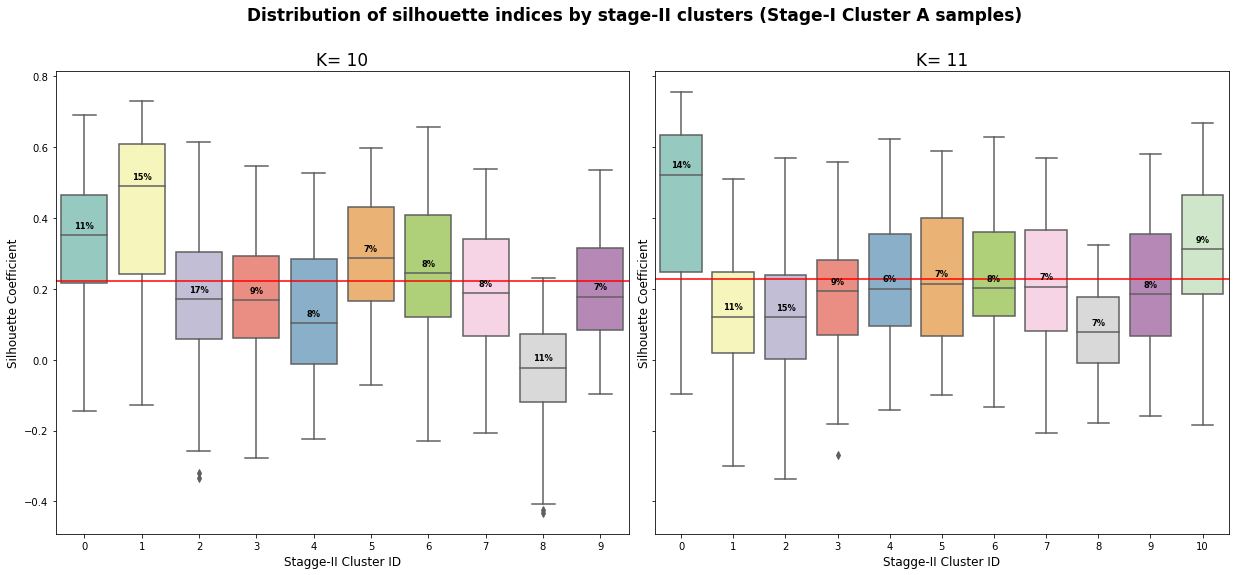

In [25]:
fig,axes =  plt.subplots(1,2,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster A samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C1_test):
    b1=sns.boxplot(ax=axes[y],x=S1C1_label_byK[j], y=ind_Sil_C1[y],palette="Set3")
    b1.set_xlabel("Stagge-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_5[0][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C1[y][S1C1_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C1_size[y][xtick])+"%", 
            horizontalalignment='center',size='small',color='black',weight='semibold')

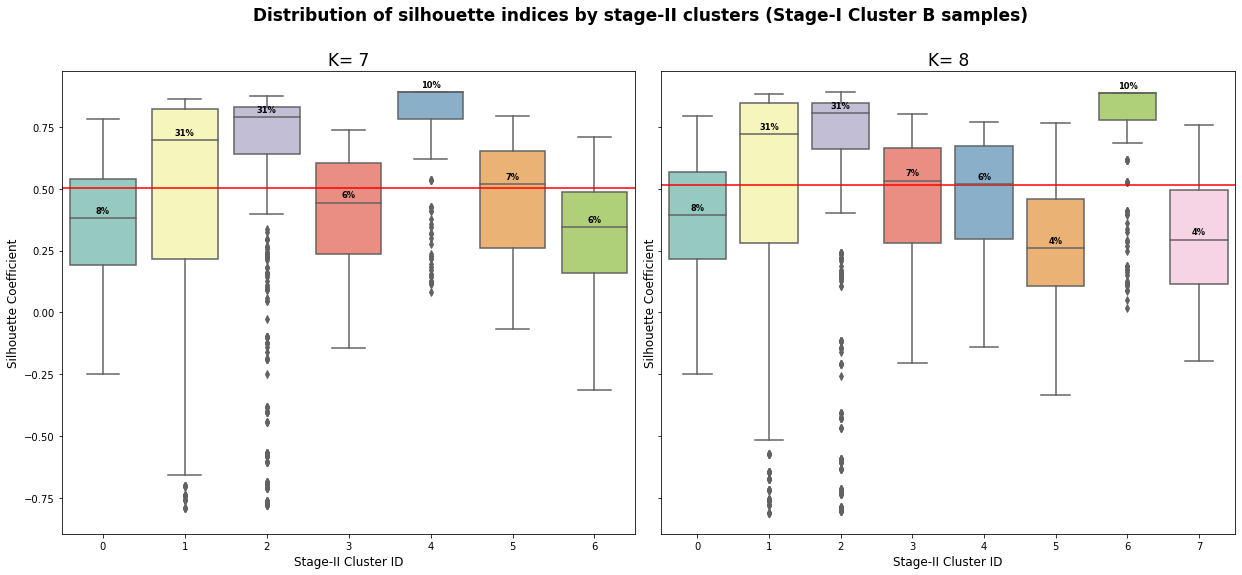

In [26]:
fig,axes =  plt.subplots(1,2,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster B samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C2_test):
    b1=sns.boxplot(ax=axes[y],x=S1C2_label_byK[j], y=ind_Sil_C2[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_10[1][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C2[y][S1C2_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C2_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')


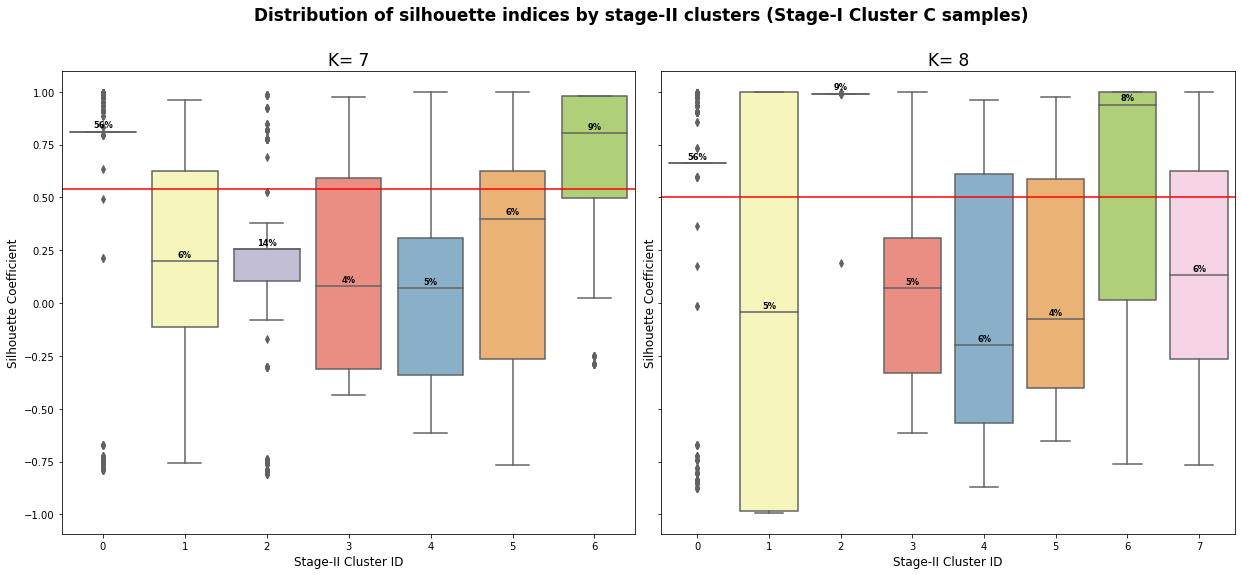

In [27]:
fig,axes =  plt.subplots(1,2,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster C samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C3_test):
    b1=sns.boxplot(ax=axes[y],x=S1C3_label_byK[j], y=ind_Sil_C3[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_5[2][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C3[y][S1C3_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C3_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')

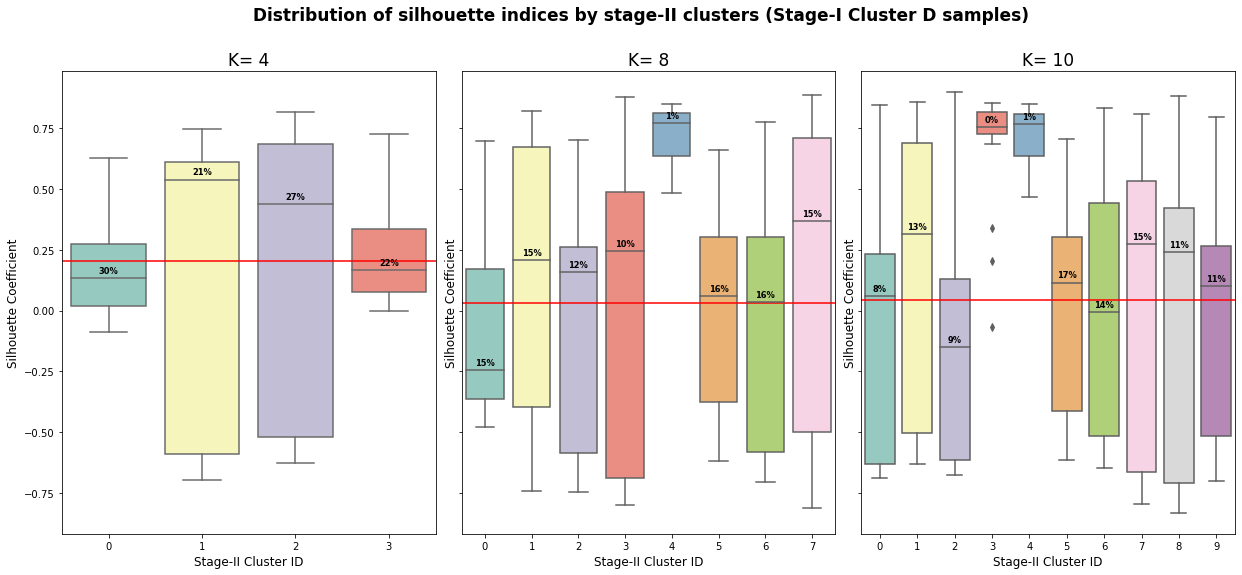

In [29]:
fig,axes =  plt.subplots(1,3,figsize=(17,7),sharey=True)
fig.tight_layout(pad=1)
fig.suptitle('Distribution of silhouette indices by stage-II clusters (Stage-I Cluster D samples)',fontsize=17,fontweight="bold",y=1.10)

for y,j in enumerate(C4_test):
    b1=sns.boxplot(ax=axes[y],x=S1C4_label_byK[j], y=ind_Sil_C4[y],palette="Set3")
    b1.set_xlabel("Stage-II Cluster ID", fontsize=12)
    b1.set_ylabel('Silhouette Coefficient',fontsize=12)
    axes[y].axhline(Ts_Sil_10[3][j], c='r')
    axes[y].set_title('K= %d' % (j+2),fontsize=17)
    
    medians=[np.median(ind_Sil_C4[y][S1C4_label_byK[j]==i]) for i in range(j+2)] 
    
    for xtick in axes[y].get_xticks():
        axes[y].text(xtick,medians[xtick] + 0.02, str(C4_size[y][xtick])+"%", 
                     horizontalalignment='center',size='small',color='black',weight='semibold')

### Visualize the distribution of longitudinal PDC trends by stage-II cluster 

In [30]:
S1C1_PDC_SP5_final=S1C1_PDC_Sample5_labeled[9]
S1C1_Med_SP5_final=S1C1_Med_Sample5[9]

S1C2_PDC_SP10_final=S1C2_PDC_Sample10_labeled[6]
S1C2_Med_SP10_final=S1C2_Med_Sample10[6]

S1C3_PDC_SP5_final=S1C3_PDC_Sample5_labeled[5]
S1C3_Med_SP5_final=S1C3_Med_Sample5[5]

S1C4_PDC_SP10_final=S1C4_PDC_Sample10_labeled[2]
S1C4_Med_SP10_final=S1C4_Med_Sample10[2]


In [145]:
#create a helper function to plot the distribution of longitudinal PDC trend
def plotdist(Cluster_PDC,DBA,C_size_f,s1_cluster,s2_cluster,row,col, alph):
    d={"A":0,"B":1,"C":2,"D":3}
    s1_cluster_index=d[s1_cluster]
    Week=np.arange(103)
    for i in range(len(Cluster_PDC[s2_cluster])):
        a[row][col].plot(Week, Cluster_PDC[s2_cluster][i], "blue", linewidth=1, alpha=alph)
        a[row][col].set_title('Cluster %s.%d (Sample Size: %s)' % (s1_cluster,s2_cluster+1,str(C_size_f[s2_cluster])+"%"),loc='left',fontweight ='bold')
    a[row][col].set_xlabel("Follow-up Time (Weeks)",fontsize=10)
    a[row][col].set_ylabel("PDC",fontsize=10)
    a[row][col].plot(DBA[s2_cluster].ravel(), linewidth=1.5,color="red")
    a[row][col].plot(extracted_DBA[s1_cluster_index][s2_cluster].ravel(), linewidth=1.5,color="green")    

In [33]:
# create lists of marginal frequency(%) of each Stage 2 cluster
x=sum(np.array([len(PDC_S1_sample1[i]) for i in range(4)]))
S1C_pct=[len(PDC_S1_sample1[i])/x for i in range(4)]

C1_size_f=np.round(np.array(cluster_relfreq_k(S1C1_label_byK,[9],True)[0])*S1C_pct[0]*100,1)
C2_size_f=np.round(np.array(cluster_relfreq_k(S1C2_label_byK,[6],True)[0])*S1C_pct[1]*100,1)
C3_size_f=np.round(np.array(cluster_relfreq_k(S1C3_label_byK,[5],True)[0])*S1C_pct[2]*100,1)
C4_size_f=np.round(np.array(cluster_relfreq_k(S1C4_label_byK,[2],True)[0])*S1C_pct[3]*100,1)


**In the plots below:** <br>
**$\color{red}{\text{Red Line}}$** = cluster-specific medoid; <br> 
**$\color{blue}{\text{Blue Line}}$** = individual PDC trend; <br>
**$\color{green}{\text{Green Line}}$** = cluster-specific DBA centroid;<br>  


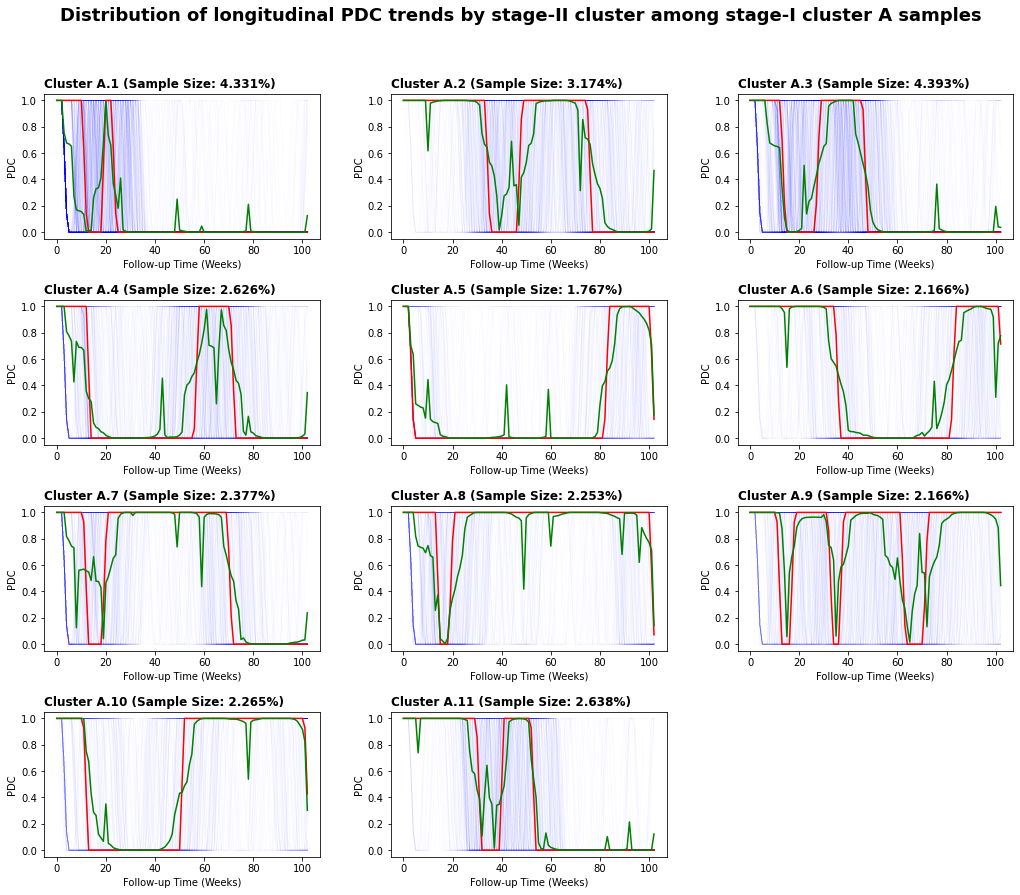

In [148]:
#cluster 2: 11
from matplotlib.pyplot import delaxes
alph=0.015
fig,a =  plt.subplots(4,3,figsize=(15,12))
fig.tight_layout(pad=4.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster A samples', fontsize=18, y=1.05,fontweight="bold")

plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",0,0,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",1,0,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",2,0,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",3,1,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",4,1,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",5,1,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",6,2,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",7,2,1,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",8,2,2,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",9,3,0,alph)
plotdist(S1C1_PDC_SP5_final,S1C1_Med_SP5_final,C1_size_f,"A",10,3,1,alph)
fig.delaxes(a[3,2])
plt.show()

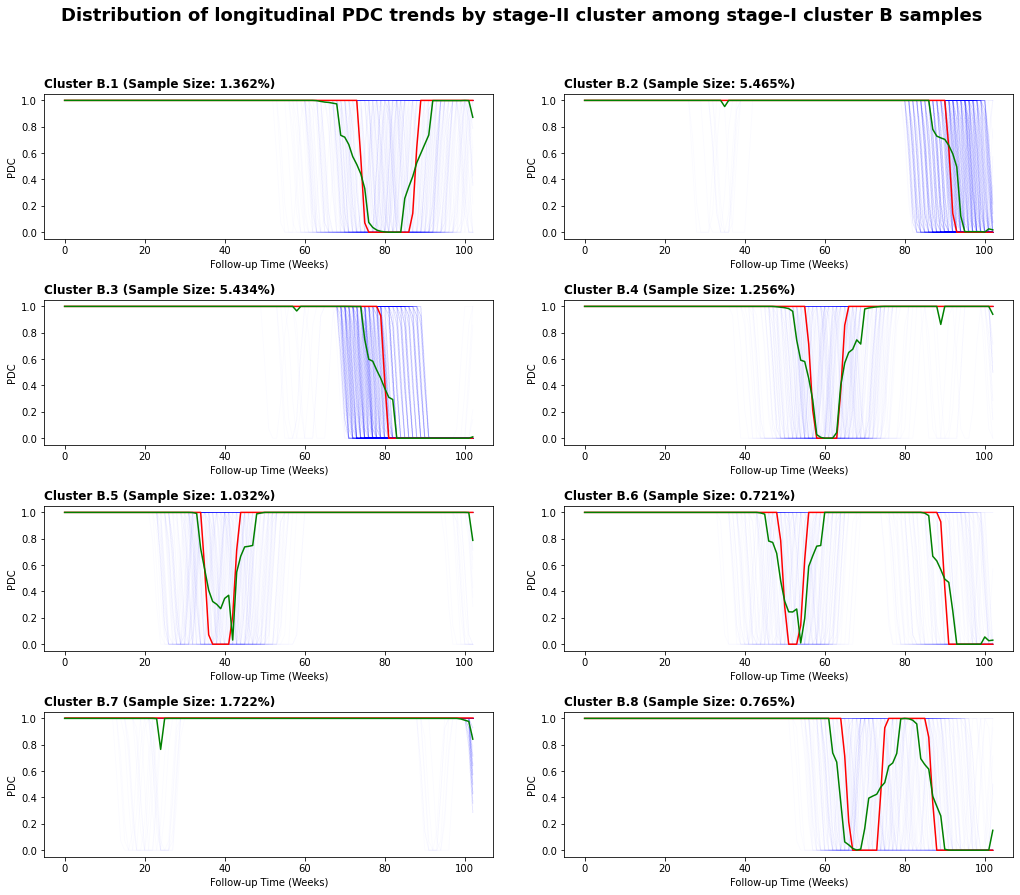

In [149]:
#cluster 2: 8
alpha=0.1
fig,a =  plt.subplots(4,2,figsize=(15,12))
fig.tight_layout(pad=4.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster B samples', fontsize=18, y=1.05,fontweight="bold")

plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",0,0,0,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",1,0,1,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",2,1,0,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",3,1,1,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",4,2,0,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",5,2,1,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",6,3,0,alph)
plotdist(S1C2_PDC_SP10_final,S1C2_Med_SP10_final,C2_size_f,"B",7,3,1,alph)
plt.show()

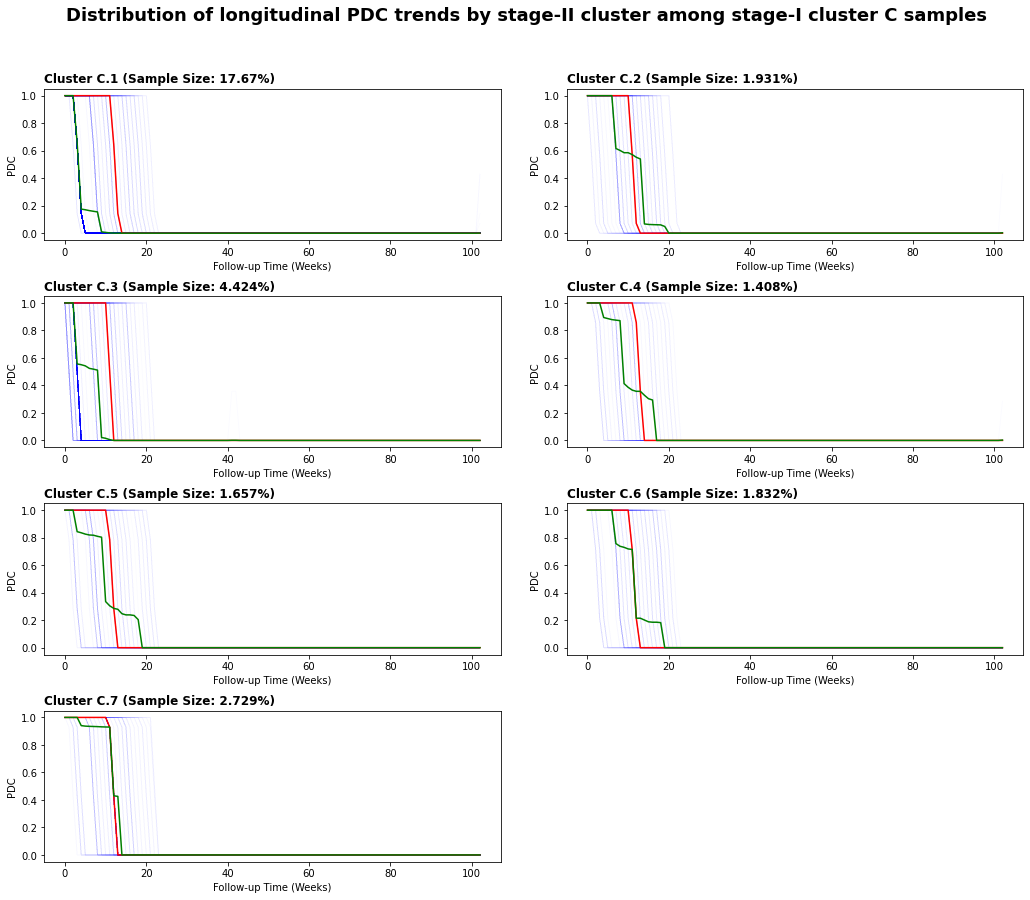

In [150]:
#cluster 3: 7
alpha=0.05
fig,a =  plt.subplots(4,2,figsize=(15,12))
fig.tight_layout(pad=3.5)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster C samples', fontsize=18, y=1.05,fontweight="bold")

plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",0,0,0,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",1,0,1,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",2,1,0,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",3,1,1,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",4,2,0,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",5,2,1,alph)
plotdist(S1C3_PDC_SP5_final,S1C3_Med_SP5_final,C3_size_f,"C",6,3,0,alph)
fig.delaxes(a[3,1])
plt.show()

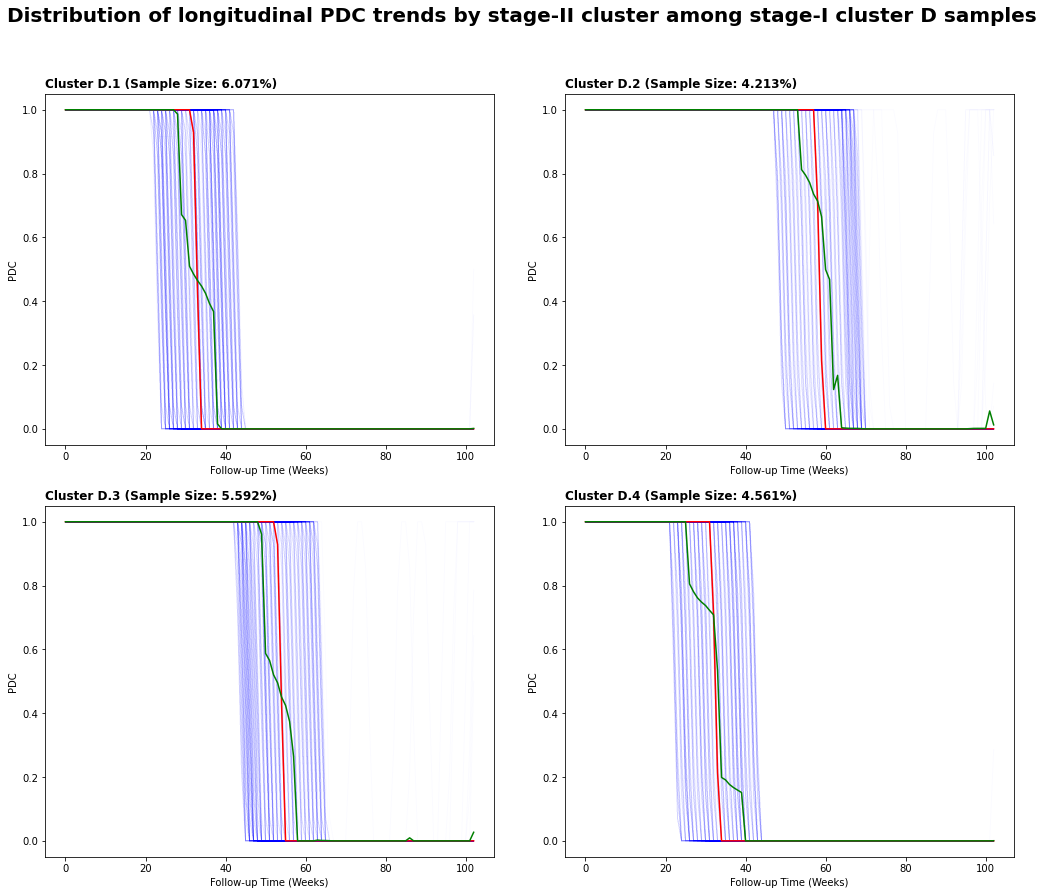

In [151]:
#cluster 4: 4
alpha=0.05
fig,a =  plt.subplots(2,2,figsize=(15,12))
fig.tight_layout(pad=4.0)

fig.suptitle('Distribution of longitudinal PDC trends by stage-II cluster among stage-I cluster D samples', fontsize=20, y=1.05,fontweight="bold")

plotdist(S1C4_PDC_SP10_final,S1C4_Med_SP10_final,C4_size_f,"D",0,0,0,alph)
plotdist(S1C4_PDC_SP10_final,S1C4_Med_SP10_final,C4_size_f,"D",1,0,1,alph)
plotdist(S1C4_PDC_SP10_final,S1C4_Med_SP10_final,C4_size_f,"D",2,1,0,alph)
plotdist(S1C4_PDC_SP10_final,S1C4_Med_SP10_final,C4_size_f,"D",3,1,1,alph)

plt.show()

### Merge clusters from the initial two-stage clustering analysis to obtain final set of PDC patterns 

To refine cluster structure, we will extract the DBA centroid as the cluster-specific prototype for each of the 30 PAM clusters. We will then use hierarchical clustering algo to cluster the extracted DBA centroids to form the final set of pattern clusters. Lastly, I will extract the DBA centroid for each of the final pattern clusters: we will weight each DBA centroid based on its original cluster's relative frequency by synthesizing a centroid dataset of size=500 where the frequency of each centroid follows the marginal relative frequency of its original cluster. 

In [57]:
C1_size_f=np.round(np.array(cluster_relfreq_k(S1C1_label_byK,[9],True)[0])*S1C_pct[0]*100,3)
C2_size_f=np.round(np.array(cluster_relfreq_k(S1C2_label_byK,[6],True)[0])*S1C_pct[1]*100,3)
C3_size_f=np.round(np.array(cluster_relfreq_k(S1C3_label_byK,[5],True)[0])*S1C_pct[2]*100,3)
C4_size_f=np.round(np.array(cluster_relfreq_k(S1C4_label_byK,[2],True)[0])*S1C_pct[3]*100,3)
cluster_freq=np.concatenate([C1_size_f,C2_size_f,C3_size_f,C4_size_f])

In [59]:
cluster_freq500=np.rint(cluster_freq*5)

In [67]:
## Build a helper function to calculate barycenter average centroid for each k value (k=2~12)
from tslearn.barycenters import dtw_barycenter_averaging
param={"global_constraint":"sakoe_chiba", "sakoe_chiba_radius":10}

def SC_DBA(SC_PDC_Sample_labeled):
    SC_DBA=[]
    for j in range(len(SC_PDC_Sample_labeled)):
        a=dtw_barycenter_averaging(SC_PDC_Sample_labeled[j], max_iter=10, metric_params=param)
        SC_DBA.append(a)
    return SC_DBA
        

In [140]:
#Compute DBA for each of the 30 PAM clusters  
S1C1_DBA=SC_DBA(S1C1_PDC_SP5_final)
S1C2_DBA=SC_DBA(S1C2_PDC_SP10_final)
S1C3_DBA=SC_DBA(S1C3_PDC_SP5_final)
S1C4_DBA=SC_DBA(S1C4_PDC_SP10_final)
extracted_DBA=[S1C1_DBA,S1C2_DBA,S1C3_DBA,S1C4_DBA]


In [74]:
#create a list object to store all 30 DBA centroids
SC_DBA_list=[S1C1_DBA,S1C2_DBA,S1C3_DBA,S1C4_DBA]
import itertools
SC_DBA_list_f = list(itertools.chain(*SC_DBA_list))

In [83]:
#replicate DBA centroids according to the frequency count they would have in the synethetic centroid dataset
freq_DBA_resize=[]
for i in range(len(SC_DBA_list_f)):
    a=[SC_DBA_list_f[i].ravel()]*cluster_freq500[i].astype(int)
    freq_DBA_resize.append(a)
freq_DBA_resize_f=list(itertools.chain(*freq_DBA_resize))

In [90]:
#compute pairwise DTW distance matrix among the DBA centroids in the centroid dataset
num=len(freq_DBA_resize_f)
freq_DBA_dist_matrix=np.zeros((num,num))
for i in range(num):
    for j in range(num):
        freq_DBA_dist_matrix[i,j]=dtw(freq_DBA_resize_f[i],freq_DBA_resize_f[j],global_constraint="sakoe_chiba", sakoe_chiba_radius=10)

In [92]:
from sklearn.cluster import AgglomerativeClustering as AHC
#Implement hierarchical clusteirng algo for various k
freq_DBA_label=[]
for k in range(2,15):
    cluster = AHC(affinity='precomputed', linkage='average',n_clusters=k).fit(freq_DBA_dist_matrix)
    freq_DBA_label.append(cluster.labels_)

In [100]:
#Compute DBA centroid for the new merged clusters under each k value
freq_labeled_DBA_byk=group_PDC(np.array(freq_DBA_resize_f),freq_DBA_label,15)

In [112]:
final_freq_DBA_byk=[]
for k in range(len(freq_labeled_DBA_byk)):
    a=SC_DBA(freq_labeled_DBA_byk[k])
    final_freq_DBA_byk.append(a)

In [117]:
#Compute SSE to help determine the optimal number of clusters to merge into 
freqDBA_SSE=[]
for k in range(len(final_freq_DBA_byk)):         
    d=[dtw(freq_labeled_DBA_byk[k][cluster_id][i],final_freq_DBA_byk[k][cluster_id],
        global_constraint="sakoe_chiba", sakoe_chiba_radius=10) 
        for cluster_id in range(len(final_freq_DBA_byk[k])) 
        for i in range(len(freq_labeled_DBA_byk[k][cluster_id]))]
    SSE=sum(np.square(d))
    freqDBA_SSE.append(SSE)

Text(45.0, 0.5, 'SSE')

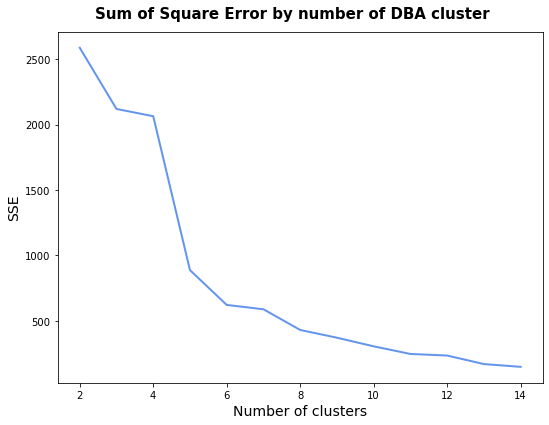

In [118]:
lin=np.arange(2,15)
fig,ax =  plt.subplots(figsize=(8,6))
fig.tight_layout(pad=3)
fig.suptitle('Sum of Square Error by number of DBA cluster',fontsize=15,fontweight="bold")
ax.plot(lin,freqDBA_SSE, "cornflowerblue", linewidth=2)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('SSE', fontsize=14)

In [122]:
#build a helper function to cluster the centroids and compute the new DBA of the new merged cluster as per the input of k value
def final_DBA(K):
    DBA_cluster = AHC(affinity='precomputed', linkage='average',n_clusters=K).fit(freq_DBA_dist_matrix)
    DBA_aggr_label=DBA_cluster.labels_

    freq_DBA_clustered=[]
    for i in range(len(cl.Counter(DBA_aggr_label))):
        a=np.array(freq_DBA_resize_f)[DBA_aggr_label==i]
        freq_DBA_clustered.append(a)

    final_freq_DBA=[]
    for i in range(len(freq_DBA_clustered)):
        a=dtw_barycenter_averaging(freq_DBA_clustered[i], max_iter=10, metric_params=param)
        final_freq_DBA.append(a)

    final_freq_DBA_CMA=[]
    for i in range(len(final_freq_DBA)):
        a=pd.Series(final_freq_DBA[i].ravel()).rolling(window=4,center=True).mean()
        final_freq_DBA_CMA.append(a)
    return freq_DBA_clustered,final_freq_DBA,final_freq_DBA_CMA,DBA_aggr_label

In [123]:
#Compute cluster label and cluster-specific DBA 
freq_DBA_clustered,final_freq_DBA,final_freq_DBA_CMA,DBA_aggr_label=final_DBA(6)

In [127]:
#Compute relative frequency of final cluster membership 
proto_frequency=pd.Series(DBA_aggr_label).value_counts()/len(DBA_aggr_label)
proto_percent=np.round(proto_frequency.sort_index()*100,1)

In [129]:
#build a helper function to plot DBA centroids of the new merged cluster
def plotdist2(cluster,row,col, alph,order):
    Week=np.arange(103)
    for i in range(len(freq_DBA_clustered[cluster])):
        a[row][col].plot(Week, freq_DBA_clustered[cluster][i], "orange", linewidth=1, alpha=alph)
    a[row][col].set_title('Pattern %d (sample size: %s)' % (order,str(proto_percent[cluster])+"%"),loc='left',fontweight ='bold', fontsize=14)
    a[row][col].set_xlabel("Follow-up Time (Weeks)",fontsize=12)
    a[row][col].set_ylabel("PDC",fontsize=12)
    a[row][col].plot(final_freq_DBA[cluster].ravel(), linewidth=3,color="red")
    a[row][col].plot(final_freq_DBA_CMA[cluster].ravel(), linewidth=2,color="blue")

**In the plot below:** <br>
**$\color{red}{\text{Red Line}}$** = the new DBA centroid; <br> 
**$\color{blue}{\text{Blue Line}}$** = the new DBA centroid smoothened (moving average window size=4 weeks); <br>
**$\color{orange}{\text{Orange Line}}$** = individual DBA centroid from the original 30 PAM clusters;<br>  

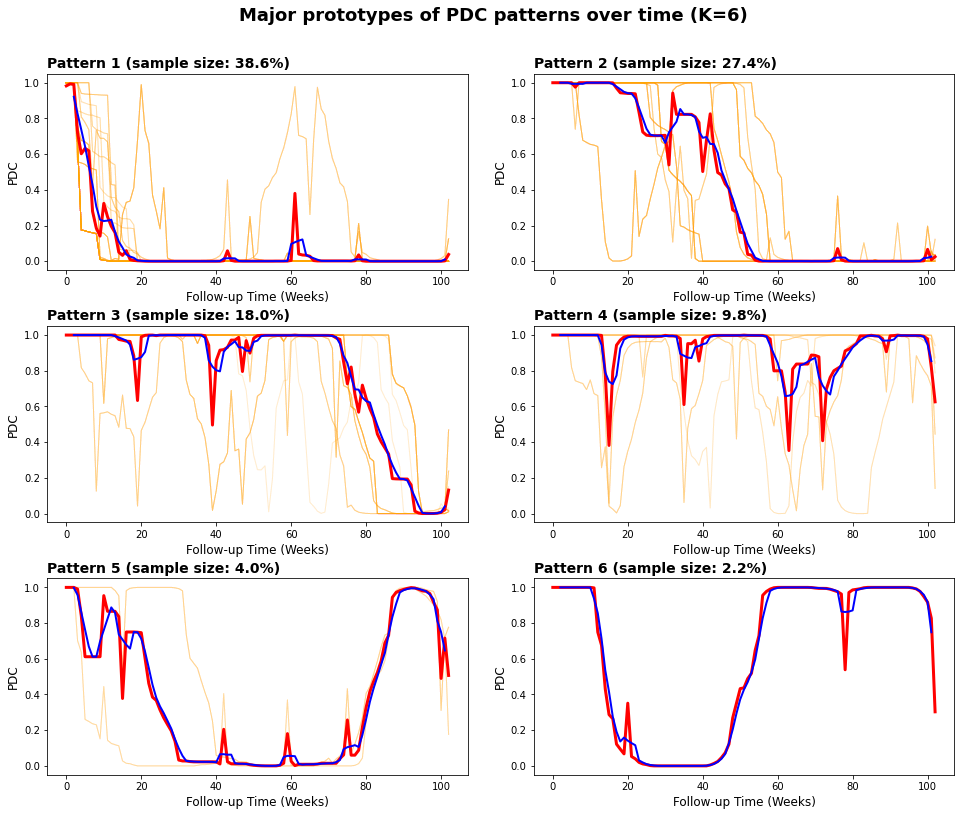

In [153]:
alpha=0.05
fig,a =  plt.subplots(3,2,figsize=(14,11))
fig.suptitle('Major prototypes of PDC patterns over time (K=6)',fontsize=18,fontweight="bold", y=1.035)
fig.tight_layout(pad=3.5)
plotdist2(4,0,0,alpha,1)
plotdist2(1,0,1,alpha,2)
plotdist2(5,1,0,alpha,3)
plotdist2(2,1,1,alpha,4)
plotdist2(0,2,0,alpha,5)
plotdist2(3,2,1,alpha,6)
plt.show()